# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

     -------------------------------------- 557.7/557.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=8f7cdea9008ad4a32a9dd38e1459d78bba8232d62e91cec7baa7588adbf00f2e
  Stored in directory: c:\users\jonandcheri2021\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

In [21]:
cities

['troitsko-pechorsk',
 'port-cartier',
 'san patricio',
 'ushuaia',
 'palu',
 'mataura',
 'taltal',
 'rikitea',
 'pombas',
 'berlevag',
 'guerrero negro',
 'vaitupu',
 'lolua',
 'taolanaro',
 'east london',
 'saskylakh',
 'samusu',
 'bethel',
 'muros',
 'mahebourg',
 'bambous virieux',
 'vaini',
 'galle',
 'ponta do sol',
 'kapaa',
 'chippewa falls',
 'san cristobal',
 'ust-koksa',
 'saint-philippe',
 'karratha',
 'enid',
 'coihaique',
 'busselton',
 'guasdualito',
 'hermanus',
 'kerki',
 'port alfred',
 'eldikan',
 'arraial do cabo',
 'lorengau',
 'norman wells',
 'tasiilaq',
 'mazagao',
 'hamilton',
 'ayan',
 'verkhnevilyuysk',
 'puerto ayora',
 'muhos',
 'ostrovnoy',
 'maumere',
 'tuatapere',
 'veraval',
 'punta arenas',
 'yining',
 'barrow',
 'castro',
 'yellowknife',
 'victoria',
 'baykit',
 'bengkulu',
 'basco',
 'iskateley',
 'kaitangata',
 'hithadhoo',
 'prince rupert',
 'spetsai',
 'bluff',
 'cidreira',
 'sobolevo',
 'butaritari',
 'berdigestyakh',
 'bud',
 'odienne',
 'albany

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | troitsko-pechorsk
Processing Record 2 of Set 1 | port-cartier
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | palu
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | taltal
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | pombas
Processing Record 10 of Set 1 | berlevag
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | lolua
City not found. Skipping...
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | samusu
City not found. Skipping...
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | muros
Processing Record 20 of Set 1 | mahebourg
Processing

Processing Record 35 of Set 4 | nemuro
Processing Record 36 of Set 4 | plettenberg bay
Processing Record 37 of Set 4 | dharchula
Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | grindavik
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | chuy
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | vao
Processing Record 45 of Set 4 | hobart
Processing Record 46 of Set 4 | lucea
Processing Record 47 of Set 4 | baglung
Processing Record 48 of Set 4 | ponta delgada
Processing Record 49 of Set 4 | kruisfontein
Processing Record 0 of Set 5 | union hidalgo
Processing Record 1 of Set 5 | mangrol
Processing Record 2 of Set 5 | goderich
Processing Record 3 of Set 5 | porbandar
Processing Record 4 of Set 5 | byron bay
Processing Record 5 of Set 5 | wakkanai
Processing Record 6 of Set 5 | umm lajj
Processing Record 7 of Set 5 | dombarovskiy
Processing Record 8 of Set 5 | warqla
City not found. 

Processing Record 29 of Set 8 | martapura
Processing Record 30 of Set 8 | bharatpur
Processing Record 31 of Set 8 | pevek
Processing Record 32 of Set 8 | yeppoon
Processing Record 33 of Set 8 | cowra
Processing Record 34 of Set 8 | kitimat
Processing Record 35 of Set 8 | champerico
Processing Record 36 of Set 8 | wolmaranstad
City not found. Skipping...
Processing Record 37 of Set 8 | dasoguz
Processing Record 38 of Set 8 | kelheim
Processing Record 39 of Set 8 | terney
Processing Record 40 of Set 8 | novikovo
Processing Record 41 of Set 8 | sinnamary
Processing Record 42 of Set 8 | north platte
Processing Record 43 of Set 8 | san carlos de bariloche
Processing Record 44 of Set 8 | matara
Processing Record 45 of Set 8 | lazaro cardenas
Processing Record 46 of Set 8 | agropoli
Processing Record 47 of Set 8 | songjianghe
Processing Record 48 of Set 8 | sioux lookout
Processing Record 49 of Set 8 | oranjemund
Processing Record 0 of Set 9 | mackenzie
Processing Record 1 of Set 9 | adrar
Pr

Processing Record 18 of Set 12 | ubeda
Processing Record 19 of Set 12 | sao joao da barra
Processing Record 20 of Set 12 | manggar
Processing Record 21 of Set 12 | ahipara
Processing Record 22 of Set 12 | murupara
Processing Record 23 of Set 12 | jiamusi
Processing Record 24 of Set 12 | macas
Processing Record 25 of Set 12 | santa rosa
Processing Record 26 of Set 12 | uberlandia
Processing Record 27 of Set 12 | farafangana
Processing Record 28 of Set 12 | mitsamiouli
Processing Record 29 of Set 12 | khromtau
Processing Record 30 of Set 12 | eskisehir
Processing Record 31 of Set 12 | pochutla
Processing Record 32 of Set 12 | conceicao do araguaia
Processing Record 33 of Set 12 | shakawe
Processing Record 34 of Set 12 | kloulklubed
Processing Record 35 of Set 12 | tabukiniberu
City not found. Skipping...
Processing Record 36 of Set 12 | hobyo
Processing Record 37 of Set 12 | sudzha
Processing Record 38 of Set 12 | masvingo
Processing Record 39 of Set 12 | jingdezhen
Processing Record 40 

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [24]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,troitsko-pechorsk,62.7084,56.1964,-18.89,100,94,1.08,RU,1675541509
1,port-cartier,50.0334,-66.8654,-19.03,69,100,8.82,CA,1675541510
2,san patricio,28.0170,-97.5169,20.97,52,61,4.33,US,1675541223
3,ushuaia,-54.8000,-68.3000,12.81,50,0,1.03,AR,1675541133
4,palu,-0.8917,119.8707,23.83,94,100,0.83,ID,1675541266
...,...,...,...,...,...,...,...,...,...
543,hobyo,5.3505,48.5268,24.16,72,59,7.95,SO,1675541627
544,sudzha,51.1976,35.2726,-2.04,94,100,2.70,RU,1675541627
545,masvingo,-20.0637,30.8277,18.95,83,34,1.86,ZW,1675541627
546,jingdezhen,29.2947,117.2079,7.34,97,80,0.85,CN,1675541627


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,troitsko-pechorsk,62.7084,56.1964,-18.89,100,94,1.08,RU,1675541509
1,port-cartier,50.0334,-66.8654,-19.03,69,100,8.82,CA,1675541510
2,san patricio,28.0170,-97.5169,20.97,52,61,4.33,US,1675541223
3,ushuaia,-54.8000,-68.3000,12.81,50,0,1.03,AR,1675541133
4,palu,-0.8917,119.8707,23.83,94,100,0.83,ID,1675541266


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

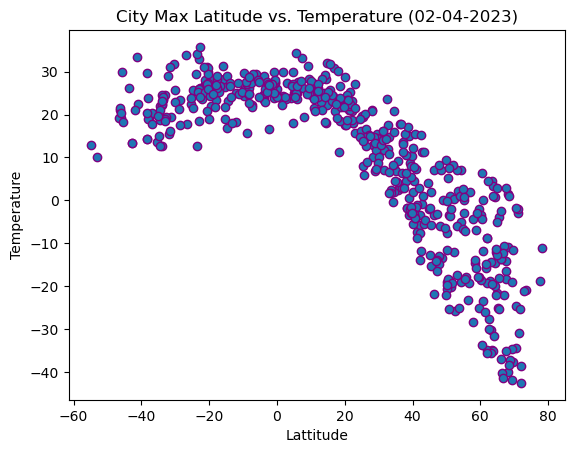

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    marker="o",
    edgecolor = "purple"
)

# Incorporate the other graph properties
date = time.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Lattitude")
plt.ylabel("Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

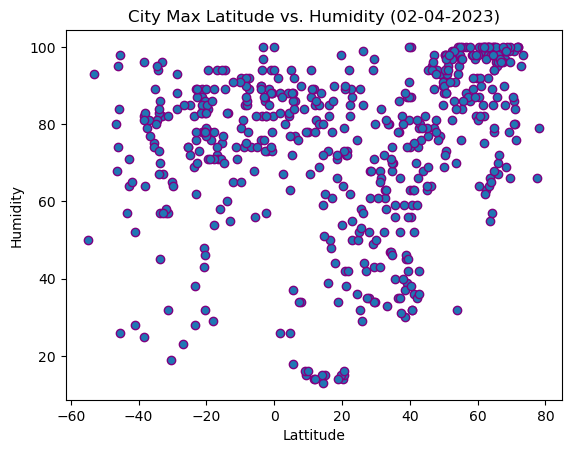

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    marker="o",
    edgecolor = "purple"
)

# Incorporate the other graph properties
date = time.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

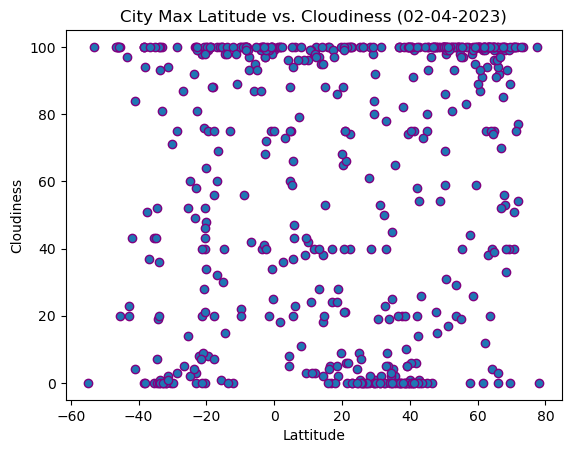

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    marker="o",
    edgecolor = "purple"
)

# Incorporate the other graph properties
date = time.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

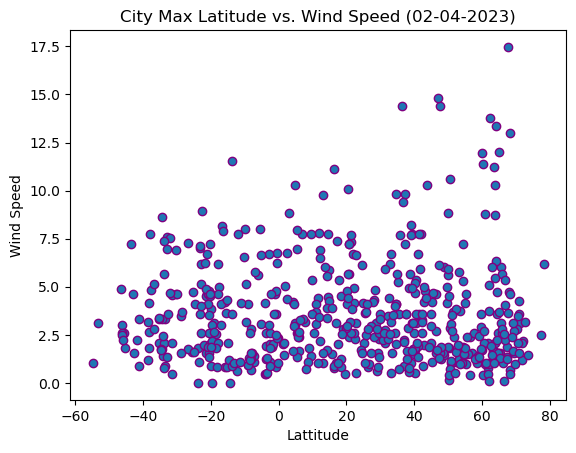

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    marker="o",
    edgecolor = "purple"
)

# Incorporate the other graph properties
date = time.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_value, y_value, title, text_coord):
    
    #Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize =15, color = "red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show
    

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,troitsko-pechorsk,62.7084,56.1964,-18.89,100,94,1.08,RU,1675541509
1,port-cartier,50.0334,-66.8654,-19.03,69,100,8.82,CA,1675541510
2,san patricio,28.0170,-97.5169,20.97,52,61,4.33,US,1675541223
8,pombas,17.1503,-25.0201,20.88,61,24,7.40,CV,1675541510
9,berlevag,70.8578,29.0864,-2.00,86,100,3.60,NO,1675541511


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,12.81,50,0,1.03,AR,1675541133
4,palu,-0.8917,119.8707,23.83,94,100,0.83,ID,1675541266
5,mataura,-46.1927,168.8643,21.16,74,100,2.99,NZ,1675541200
6,taltal,-25.4000,-70.4833,22.47,74,14,1.60,CL,1675541510
7,rikitea,-23.1203,-134.9692,25.85,76,3,7.04,PF,1675541189


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7588140998706461


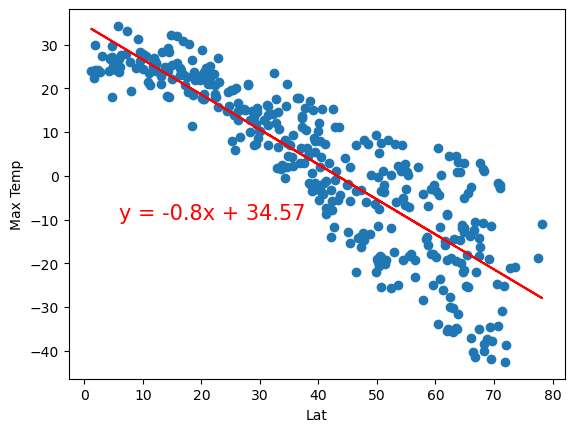

In [76]:
# Linear regression on Northern Hemisphere
x_values_n = northern_hemi_df["Lat"]
y_values_n = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values_n, y_values_n, "Max Temp", (6, -10))

The r-value is 0.1882073864637055


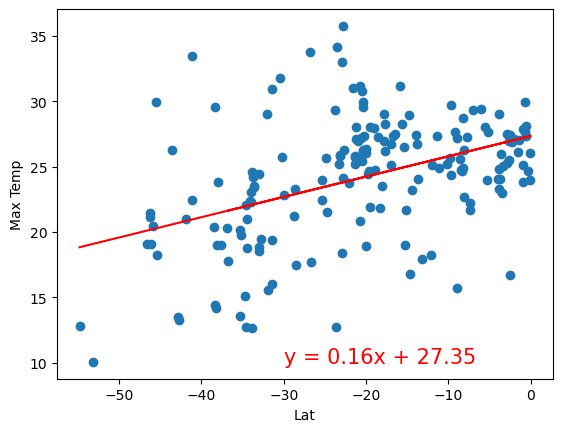

In [93]:
# Linear regression on Southern Hemisphere
x_values_s = southern_hemi_df["Lat"]
y_values_s = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values_s, y_values_s, "Max Temp", (-30,10))

**Discussion about the linear relationship:** #With an r-value of 0.18, it would appear there is a weak/no correlation between Lattitude and Max Temp in the Southern Hemisphere.

In [ ]:
#With an r-value of 0.75, it would appear there is a borderline strong correlation between Lattitude and Max Temp in the Northern Hemisphere.
#With an r-value of 0.18, it would appear there is a weak/no correlation between Lattitude and Max Temp in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.20189876098128687


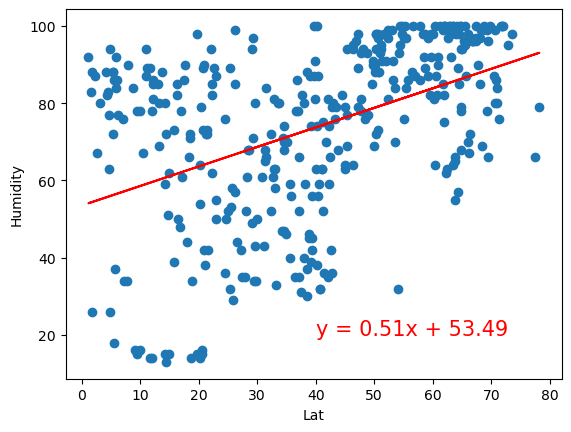

In [97]:
# Northern Hemisphere
x_values_n = northern_hemi_df["Lat"]
y_values_n = northern_hemi_df["Humidity"]
plot_linear_regression(x_values_n, y_values_n, "Humidity", (40, 20))

The r-value is 0.07605382869365171


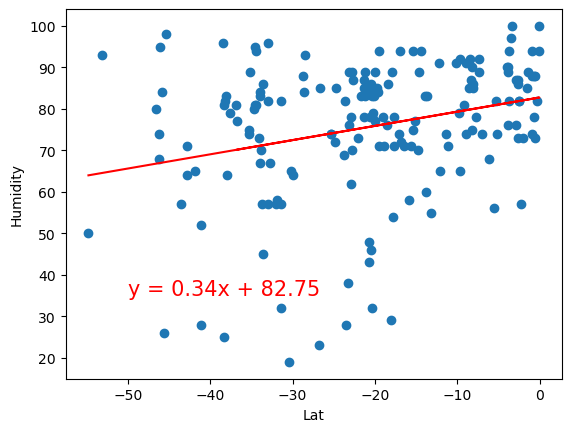

In [99]:
# Southern Hemisphere
x_values_s = southern_hemi_df["Lat"]
y_values_s = southern_hemi_df["Humidity"]
plot_linear_regression(x_values_s, y_values_s, "Humidity", (-50, 35))

**Discussion about the linear relationship:** #There is no correlation between Lattitude and Humidity in the Northern and Southern Hemispheres.

In [ ]:
#There is no correlation between Lattitude and Humidity in the Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.07276843791386073


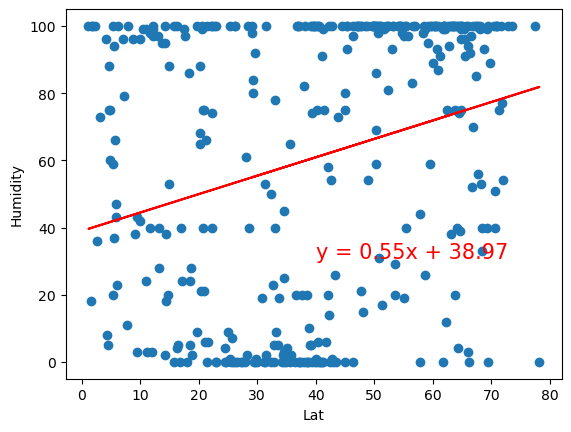

In [104]:
# Northern Hemisphere
x_values_n = northern_hemi_df["Lat"]
y_values_n = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values_n, y_values_n, "Cloudiness", (40, 31))

The r-value is 0.07276843791386073


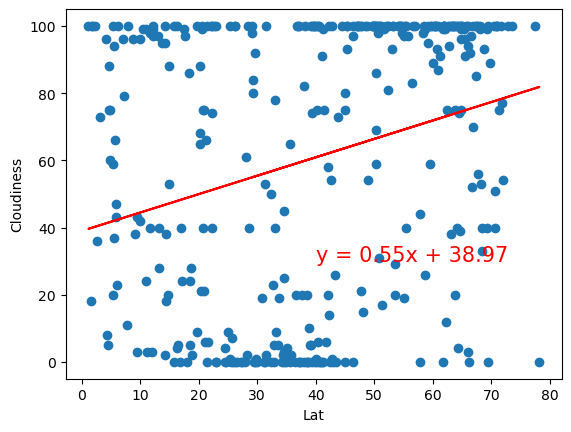

In [106]:
# Southern Hemisphere
x_values_s = southern_hemi_df["Lat"]
y_values_s = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values_s, y_values_s, "Cloudiness", (40, 30))

**Discussion about the linear relationship:** #There is no correlation between Lattitude and Cloudiness in the Northern and Southern Hemispheres.

In [ ]:
#There is no correlation between Lattitude and Cloudiness in the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0038408628789990307


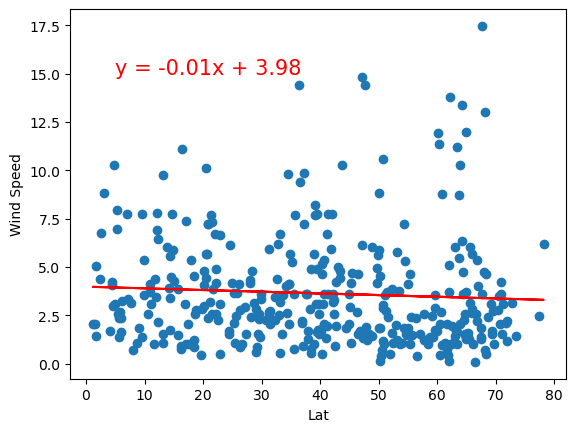

In [109]:
# Northern Hemisphere
x_values_n = northern_hemi_df["Lat"]
y_values_n = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values_n, y_values_n, "Wind Speed", (5,15))

The r-value is 0.0038926335675536212


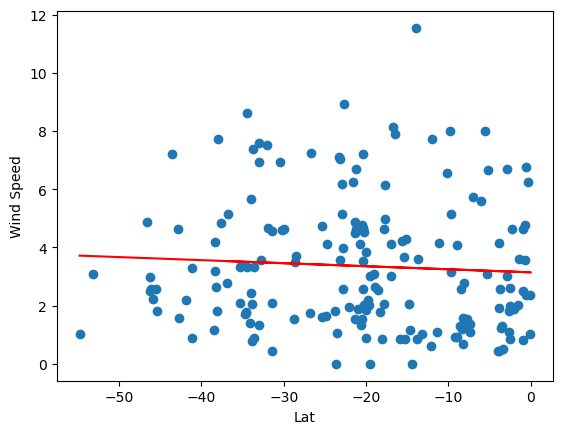

In [110]:
# Southern Hemisphere
x_values_s = southern_hemi_df["Lat"]
y_values_s = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values_s, y_values_s, "Wind Speed", (5,15))

**Discussion about the linear relationship:** ##There is no correlation between Lattitude and Wind Speed in the Northern and Southern Hemispheres.

In [ ]:
##There is no correlation between Lattitude and Wind Speed in the Northern and Southern Hemispheres.